In [1]:
import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 

In [2]:
df = pd.read_csv('times.csv',index_col=0)
df.head()

,lang,talla_dict,talla_consultas,SpellSuggester_type,alg,iter,elapsed
0,Spanish,100,10,Iterative,levenshtein,0,0.222999
1,Spanish,100,10,Iterative,levenshtein,1,0.227996
2,Spanish,100,10,Iterative,restricted,0,0.283030
3,Spanish,100,10,Iterative,restricted,1,0.276966
4,Spanish,100,10,Iterative,intermediate,0,0.133016


In [3]:
df['alg'] = df['SpellSuggester_type'] + '__' + df['alg']
df.drop('SpellSuggester_type',axis=1,inplace=True)

df.head()

,lang,talla_dict,talla_consultas,alg,iter,elapsed
0,Spanish,100,10,Iterative__levenshtein,0,0.222999
1,Spanish,100,10,Iterative__levenshtein,1,0.227996
2,Spanish,100,10,Iterative__restricted,0,0.283030
3,Spanish,100,10,Iterative__restricted,1,0.276966
4,Spanish,100,10,Iterative__intermediate,0,0.133016


In [4]:
tmp = df.groupby(['lang','talla_dict','talla_consultas','alg'])['elapsed'].agg(['mean','std'])
tmp

mean       std
lang    talla_dict talla_consultas alg                                        
Spanish 100        10              Iterative__intermediate  0.130119  0.004097
                                   Iterative__levenshtein   0.225498  0.003534
                                   Iterative__restricted    0.279998  0.004288
                                   Trie__levenshtein        0.108512  0.003564
                                   Trie__restricted         0.218493  0.089853

Las desviaciones estandar son insignificantes por lo que podemos considerar que los tiempos calculados en las diversas ejecuciones son validos y a partir de ahora trabajaremos con la media de las multiple iteraciones

In [5]:
tmp = df.groupby(['talla_dict','talla_consultas','alg'])['lang','elapsed'].agg(['mean','std'])
tmp

elapsed          
                                                        mean       std
talla_dict talla_consultas alg                                        
100        10              Iterative__intermediate  0.130119  0.004097
                           Iterative__levenshtein   0.225498  0.003534
                           Iterative__restricted    0.279998  0.004288
                           Trie__levenshtein        0.108512  0.003564
                           Trie__restricted         0.218493  0.089853

Los tiempos de ejecucion entre los dos diccionarios ingles y español son muy parecidos, por lo que consideramos que los diversos algoritmos trabajan igual en ambos, tal y como era de esperar,por lo que a partir de ahora trabajaremos con la media entre estos dos

In [6]:
df = df.groupby(['talla_dict','talla_consultas','alg'])['elapsed'].mean().reset_index()
df.head()

,talla_dict,talla_consultas,alg,elapsed
0,100,10,Iterative__intermediate,0.130119
1,100,10,Iterative__levenshtein,0.225498
2,100,10,Iterative__restricted,0.279998
3,100,10,Trie__levenshtein,0.108512
4,100,10,Trie__restricted,0.218493


In [7]:
#df.talla_consultas  = df.talla_consultas.astype('category')
#df.talla_dict  = df.talla_consultas.astype('category')

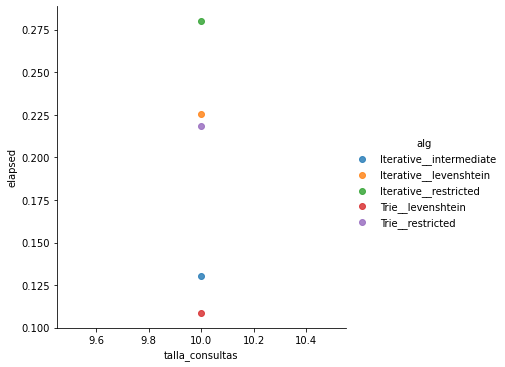

In [8]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="talla_consultas", y="elapsed", hue='alg',
    height=5
)

# Use more informative axis labels than are provided by default
#g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

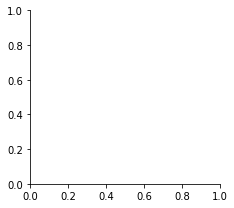

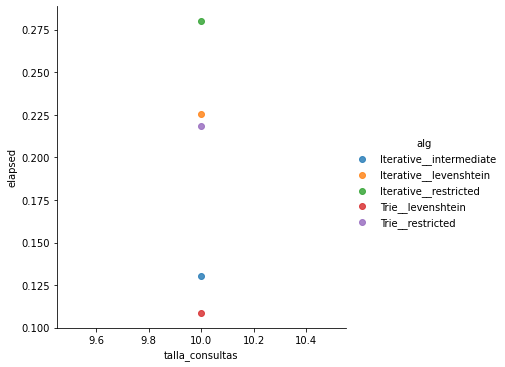

In [9]:
g = sns.FacetGrid(df, col="talla_dict", col_wrap=5)
g = sns.lmplot(
    data=df,
    x="talla_consultas", y="elapsed", hue='alg',
    #height=5
)